In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
whale_returns_csv=Path("../pandas_homework/Starter_Code/Resources/whale_returns.csv")
whale_pd=pd.read_csv(whale_returns_csv,index_col="Date",parse_dates=True)
whale_pd.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
whale_pd.dropna(inplace=True)
whale_pd.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
algo_returns_csv=Path("../pandas_homework/Starter_Code/Resources/algo_returns.csv")
algo_pd=pd.read_csv(algo_returns_csv,index_col="Date",parse_dates=True)
algo_pd.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
algo_pd.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
algo_pd.dropna(inplace=True)
algo_pd.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [8]:
sp500_history_csv=Path("../pandas_homework/Starter_Code/Resources/sp500_history.csv")
sp500_pd=pd.read_csv(sp500_history_csv,index_col="Date",parse_dates=True)
sp500_pd.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
sp500_pd.info()
sp500_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
sp500_pd["Close"] = sp500_pd["Close"].str.replace('$','')
sp500_pd.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
sp500_pd["Close"] = sp500_pd["Close"].astype('float64')
sp500_pd.info()
sp500_pd["Close"] = sp500_pd["Close"].pct_change()
sp500_pd.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
sp500_pd.dropna(inplace=True)
sp500_pd.isnull().sum()

Close    0
dtype: int64

In [13]:
sp500_pd.columns=["S&P 500"]
sp500_pd.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
all_returns=pd.concat([whale_pd,sp500_pd,algo_pd], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


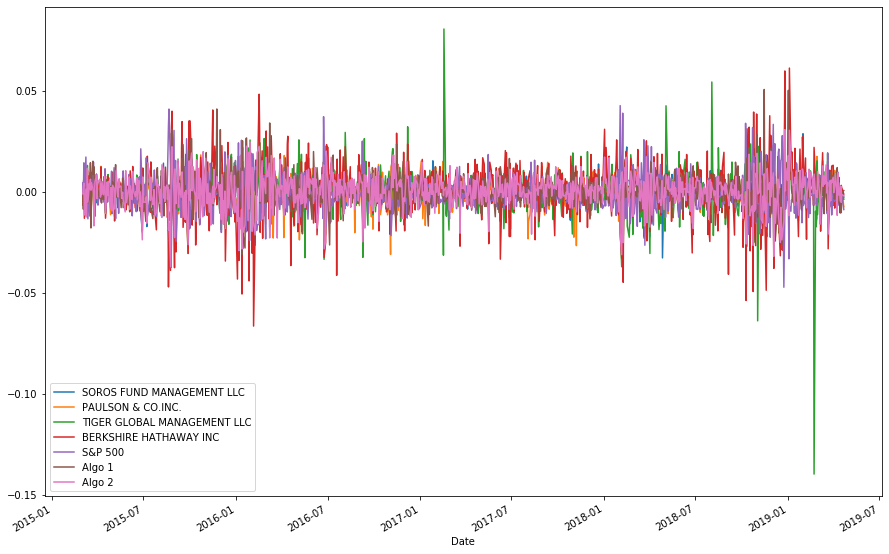

In [15]:
all_returns.plot(figsize=(15,10))

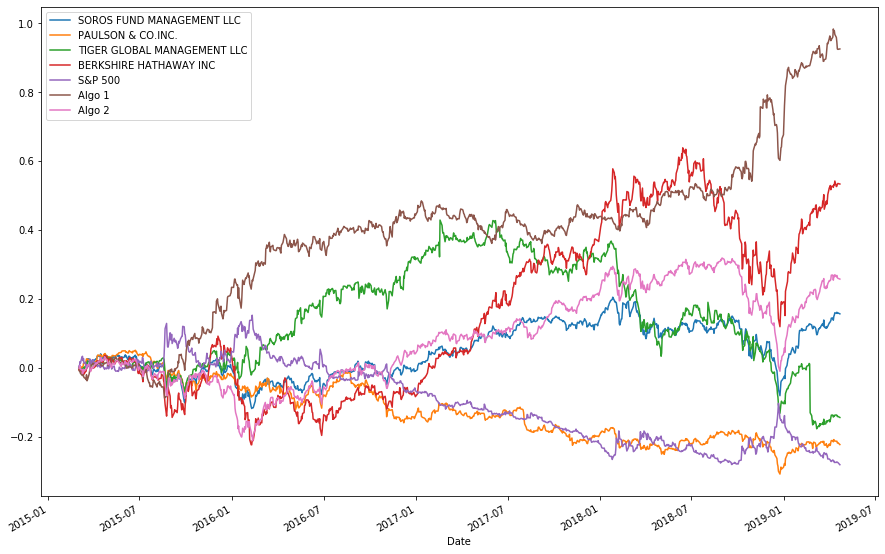

In [22]:
cumulative_returns=(1+all_returns).cumprod()-1
cumulative_returns.plot(figsize=(15,10))

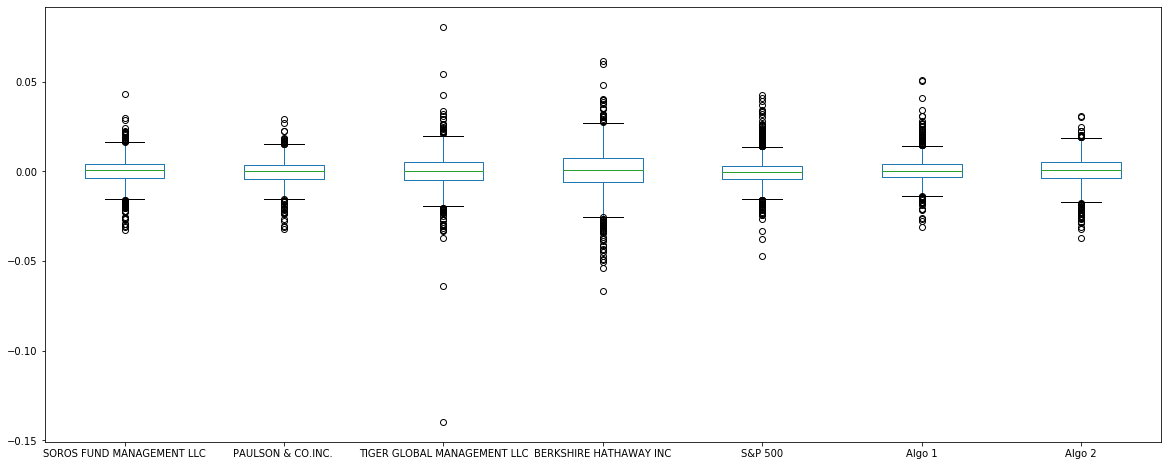

In [23]:
# RISK
all_returns.plot.box(figsize=(20,8))

In [24]:
# STANDARD DEVIATION
daily_std=all_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
Algo 1                         0.007623
Algo 2                         0.008341
dtype: float64


In [25]:
# RISKIEST PORTFOLIOS
risky=daily_std[daily_std>daily_std["S&P 500"]]
print(risky)

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [26]:
# ANNUAL STANDARD DEVIATION (252 DAYS)
annualized_std=daily_std*np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
S&P 500                        0.136313
Algo 1                         0.121006
Algo 2                         0.132413
dtype: float64

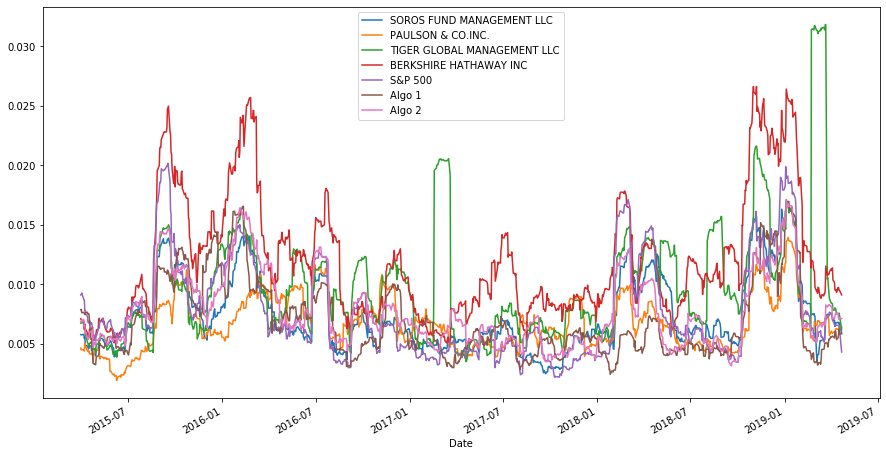

In [28]:
# ROLLING STATS
all_returns.rolling(window=21).std().plot(figsize=(15,8))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.000574,0.320901,0.826730
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.013549,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,-0.001505,0.164114,0.507160
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,-0.013856,0.291678,0.687756
S&P 500,0.000574,0.013549,-0.001505,-0.013856,1.000000,-0.033963,-0.002192
Algo 1,0.320901,0.268631,0.164114,0.291678,-0.033963,1.000000,0.287852
Algo 2,0.826730,0.678085,0.507160,0.687756,-0.002192,0.287852,1.000000


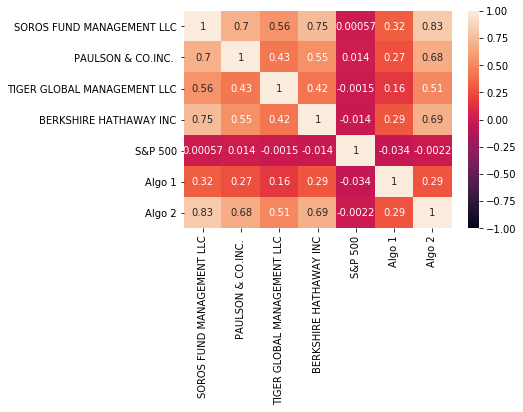

In [25]:
# CORRELATION
import seaborn as sb
correlation=all_returns.corr()
sb.heatmap(correlation,vmin=-1,vmax=1,annot=True,)
correlation

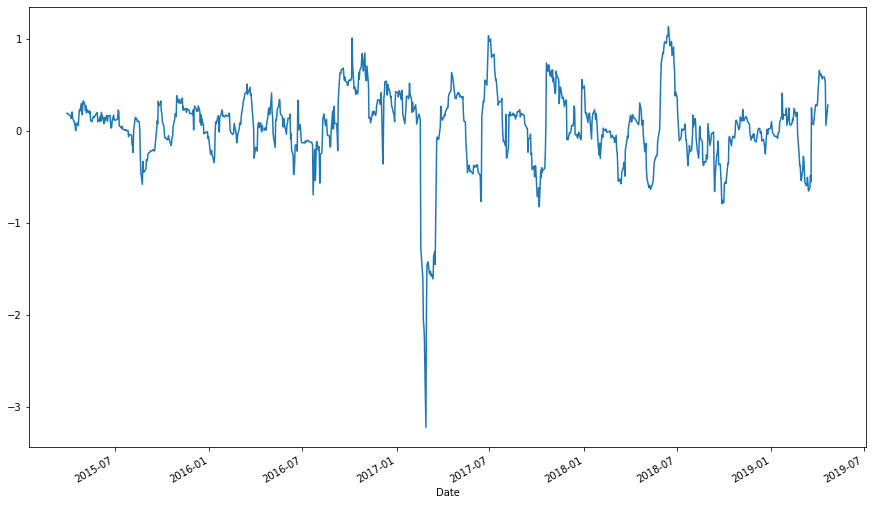

In [30]:
# CALCULATE BETA
covariance=all_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(all_returns['S&P 500'])
rolling_covariance=all_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=20).cov(all_returns['S&P 500'])

variance=all_returns['S&P 500'].var()
rolling_variance=all_returns['S&P 500'].rolling(window=20).var()

tiger_beta=rolling_covariance/rolling_variance

beta=tiger_beta.plot(figsize=(15,9))

In [26]:
# SHARPE RATIOS
sharpe_ratios=(all_returns.mean()*252)/(all_returns.std()*np.sqrt(252))
sharpe_ratios.sort_values()

S&P 500                       -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

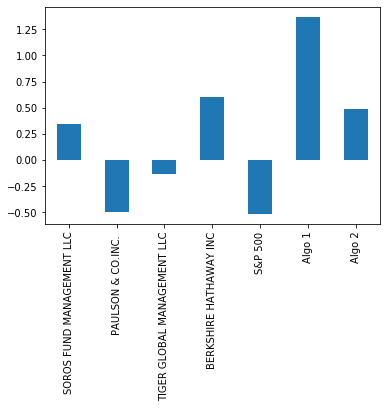

In [27]:
sharpe_ratios.plot.bar()

In [48]:
# CUSTOM PORTFOLIO
AMD_returns_csv=Path("../pandas_homework/Custom_Portfolio/amd_historical.csv")
AMD_pd=pd.read_csv(AMD_returns_csv,index_col="Date",parse_dates=True)
AMD_pd.head()

,Close
Date,
2018-05-11,11.95
2018-05-14,12.23
2018-05-15,12.45
2018-05-16,12.82
2018-05-17,12.82


In [49]:
AMD_pd.isnull().sum()

Close    0
dtype: int64

In [50]:
AMD_pd.dropna(inplace=True)
AMD_pd.isnull().sum()

Close    0
dtype: int64

In [51]:
nvda_returns_csv=Path("../pandas_homework/Custom_Portfolio/nvda_historical.csv")
nvda_pd=pd.read_csv(nvda_returns_csv,index_col="Date",parse_dates=True)
nvda_pd.head()

,Close
Date,
2018-05-11,254.53
2018-05-14,255.36
2018-05-15,245.56
2018-05-16,246.01
2018-05-17,247.71


In [53]:
nvda_pd.isnull().sum()

Close    0
dtype: int64

In [54]:
nvda_pd.dropna(inplace=True)
nvda_pd.isnull().sum()

Close    0
dtype: int64

In [55]:
msft_returns_csv=Path("../pandas_homework/Custom_Portfolio/msft_historical.csv")
msft_pd=pd.read_csv(msft_returns_csv,index_col="Date",parse_dates=True)
msft_pd.head()

,Close
Date,
2018-05-11,97.70
2018-05-14,98.03
2018-05-15,97.32
2018-05-16,97.15
2018-05-17,96.18


In [56]:
msft_pd.isnull().sum()

Close    0
dtype: int64

In [57]:
msft_pd.dropna(inplace=True)
msft_pd.isnull().sum()

Close    0
dtype: int64

In [59]:
custom_returns=pd.concat([AMD_pd,nvda_pd,msft_pd,], axis="columns", join="inner")
custom_returns.head()

,Close,Close,Close
Date,,,
2018-05-11,11.95,254.53,97.70
2018-05-14,12.23,255.36,98.03
2018-05-15,12.45,245.56,97.32
2018-05-16,12.82,246.01,97.15
2018-05-17,12.82,247.71,96.18


In [60]:
custom_returns.columns=["AMD", "NVDA", "MSFT"]
custom_returns.head()

,AMD,NVDA,MSFT
Date,,,
2018-05-11,11.95,254.53,97.70
2018-05-14,12.23,255.36,98.03
2018-05-15,12.45,245.56,97.32
2018-05-16,12.82,246.01,97.15
2018-05-17,12.82,247.71,96.18


In [61]:
custom_returns.tail()

,AMD,NVDA,MSFT
Date,,,
2019-05-02,28.29,183.19,126.21
2019-05-03,28.22,183.01,128.90
2019-05-06,27.42,179.85,128.15
2019-05-07,26.66,173.11,125.52
2019-05-08,27.09,173.92,125.51


In [62]:
custom_returns.dtypes

AMD     float64
NVDA    float64
MSFT    float64
dtype: object

In [63]:
custom_returns.dropna(inplace=True)

In [64]:
# WEIGHTED RETURNS OF CUSTOM PORTFOLIO
weights = [1/3, 1/3, 1/3]
weighted_returns = custom_returns.dot(weights)
weighted_returns.columns = ['Custom']
print(weighted_returns.columns)
print(weighted_returns.head())

['Custom']
Date
2018-05-11    121.393333
2018-05-14    121.873333
2018-05-15    118.443333
2018-05-16    118.660000
2018-05-17    118.903333
dtype: float64


In [80]:
new_combined_df = pd.concat([all_returns,weighted_returns], axis="columns", join="inner")
new_combined_df.rename(columns={0:'New'}, inplace=True)
new_combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,New
Date,,,,,,,,
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,-0.000883,0.000358,0.000281,121.393333
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.006889,0.000915,0.001635,121.873333
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.001135,-0.001139,118.443333
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.000857,-0.002326,0.003341,118.660000
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,0.002639,-0.006949,0.005205,118.903333


In [81]:
print(new_combined_df)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2018-05-11                  -0.004717            0.000982   
2018-05-14                   0.000000            0.000000   
2018-05-15                  -0.000726           -0.001409   
2018-05-16                   0.008637            0.006244   
2018-05-17                  -0.001955            0.002524   
...                               ...                 ...   
2019-04-15                  -0.001422           -0.001156   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC   S&P 500  \
Date                                                                        
2018-05-11                     0.002624             

In [82]:
new_combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
S&P 500                        0
Algo 1                         0
Algo 2                         0
New                            0
dtype: int64

In [83]:
new_df_risk=new_combined_df.std()
print(new_df_risk.sort_values())

PAULSON & CO.INC.               0.007350
Algo 1                          0.008419
Algo 2                          0.008769
SOROS FUND MANAGEMENT LLC       0.009234
S&P 500                         0.009584
TIGER GLOBAL MANAGEMENT LLC     0.014642
BERKSHIRE HATHAWAY INC          0.015548
New                            17.044706
dtype: float64


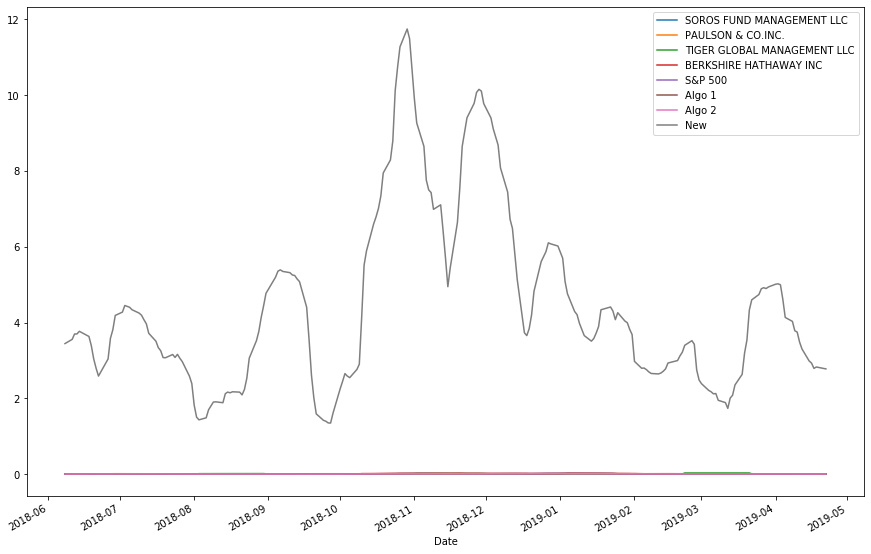

In [84]:
new_rolling21=new_combined_df.rolling(window=20).std().plot(figsize=(15,10))

In [85]:
new_sharpe=(new_combined_df.mean()*252)/(new_combined_df.std()*np.sqrt(252))
new_sharpe.sort_values()

TIGER GLOBAL MANAGEMENT LLC     -1.052249
S&P 500                         -0.432942
Algo 2                           0.009467
BERKSHIRE HATHAWAY INC           0.085005
PAULSON & CO.INC.                0.236041
SOROS FUND MANAGEMENT LLC        0.344766
Algo 1                           1.999866
New                            105.082110
dtype: float64

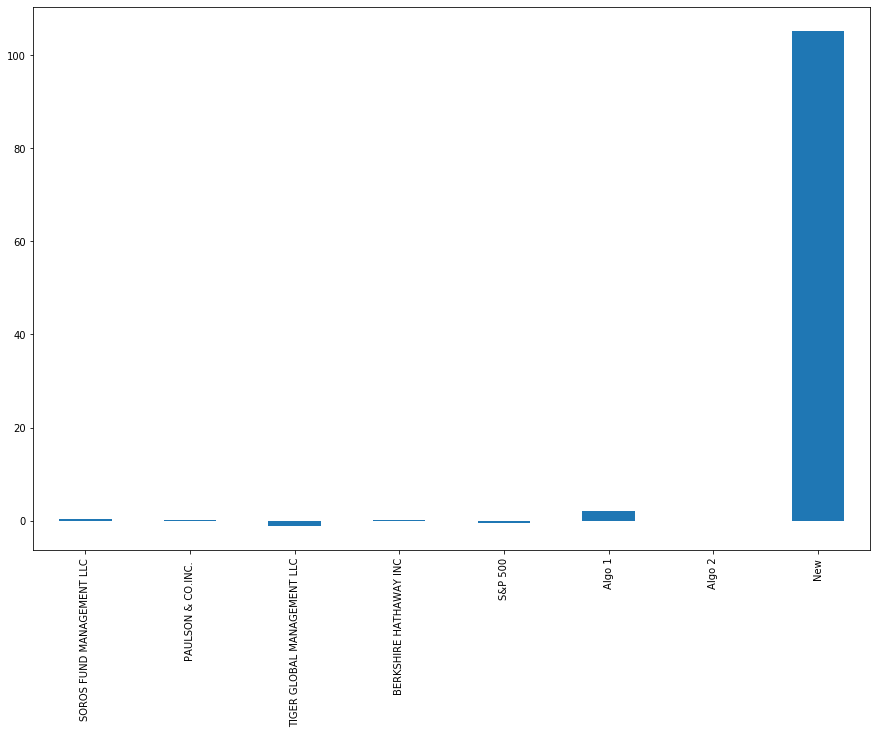

In [86]:
new_bar=new_sharpe.plot.bar(figsize=(15,10))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2,New
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,-0.028091,0.336890,0.861989,-0.015715
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,-0.059893,0.360668,0.783856,0.058921
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.005812,0.113568,0.408381,0.062068
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,-0.038751,0.326025,0.781894,-0.058487
S&P 500,-0.028091,-0.059893,0.005812,-0.038751,1.000000,-0.054454,-0.042549,0.073538
Algo 1,0.336890,0.360668,0.113568,0.326025,-0.054454,1.000000,0.364440,-0.045532
Algo 2,0.861989,0.783856,0.408381,0.781894,-0.042549,0.364440,1.000000,-0.024440
New,-0.015715,0.058921,0.062068,-0.058487,0.073538,-0.045532,-0.024440,1.000000


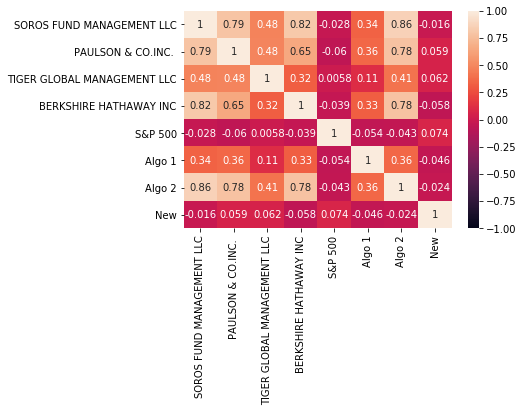

In [87]:
import seaborn as sb
combined_corr=new_combined_df.corr()
sb.heatmap(combined_corr,vmin=-1,vmax=1,annot=True,)
combined_corr

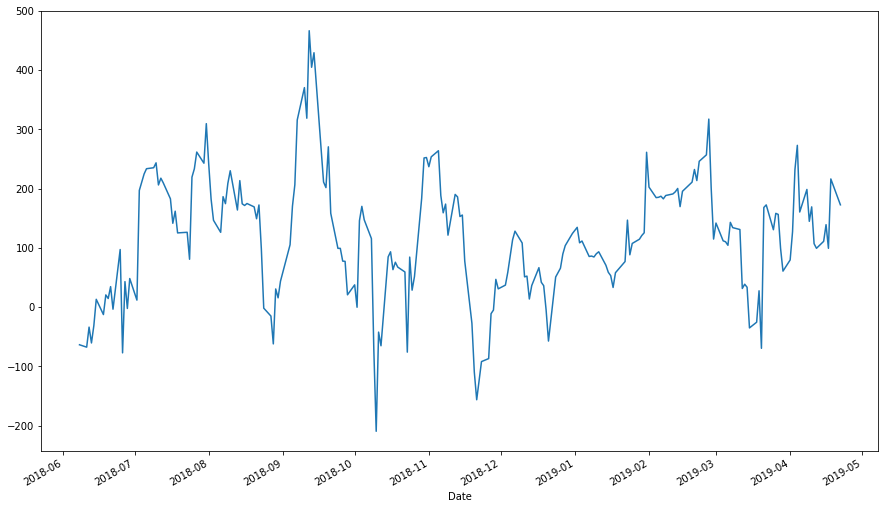

In [89]:
new_covariance=new_combined_df['New'].cov(all_returns['S&P 500'])
new_rolling_covariance=new_combined_df['New'].rolling(window=20).cov(all_returns['S&P 500'])

new_variance=new_combined_df['S&P 500'].var()
new_rolling_variance=new_combined_df['S&P 500'].rolling(window=20).var()

new_beta=new_rolling_covariance/new_rolling_variance

beta=new_beta.plot(figsize=(15,9))

In [ ]:
# FIN